In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
df = pd.read_json("gme.json")
import numpy as np

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


#### The variables found on this dataset  is the 
Date- which was the date that the stock was watched, 
Open- This was the price when the market opened, 
High- the highest price it went for , 
Low - how low the price went for on a particular day, 
Close- how much it was sold when the market closed, 
Adj Close- The adjusted price of a stock when the market closes,
Volume- The number of the stocks being traded in a single day.

In [3]:
df["High"].max()

120.75

In [4]:
df[df["High"] == 120.75]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


### The date that GameStop reached an all time high was on 1/28/21(January 28, 2021).

#### This was our attempt to find the average of each month

In [5]:
#df["Month"] = df["Date"].dt.month

In [6]:
#jan = df[df["Month"] == 1] feb = df[df["Month"] == 2] mar = df[df["Month"] == 3] apr = df[df["Month"] == 4]
#may = df[df["Month"] == 5] jun = df[df["Month"] == 6] jul = df[df["Month"] == 7] aug = df[df["Month"] == 8]
#sep = df[df["Month"] == 9] octo = df[df["Month"] == 10] nov = df[df["Month"] == 11] dec = df[df["Month"] == 12]

#### Teacher Live
##### Note that we can also do ".year" and ".day" where the ".month" is.

In [7]:
type(df.loc[0]["Date"]).month

<attribute 'month' of 'datetime.date' objects>

In [8]:
count = 0
total = 0

for i in range(len(df)):
    if df.loc[i]["Date"].month == 1:
        avg = (df.loc[i]["High"] + df.loc[i]["Low"]) / 2
        total += avg
        count += 1
total/count

8.394146076404493

<AxesSubplot:xlabel='Low', ylabel='Volume'>

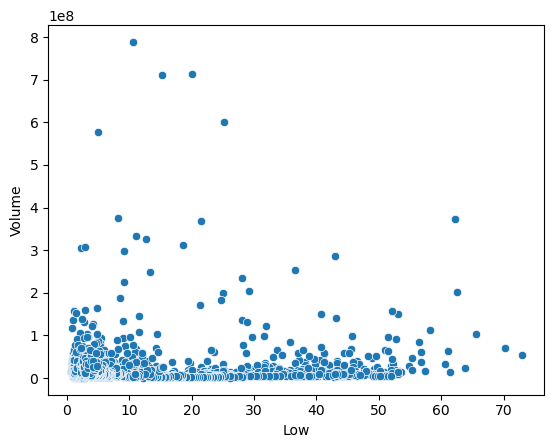

In [9]:
sns.scatterplot(data=df, x="Low", y="Volume")

In [10]:
df["Low"].corr(df["Volume"])

0.10259646883179026

After examining the scatterplot for Low vs. Volume, there appears to be no relationship between these variables. The Pearson correlation coefficient showed that is was a 0.1, meaning that the relationship is very, very weak. The direction is still positive.

<AxesSubplot:xlabel='Date', ylabel='High'>

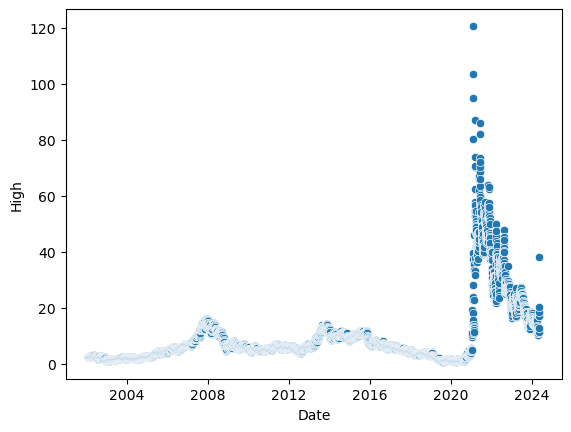

In [11]:
sns.scatterplot(data=df, x="Date", y="High")

In [15]:
df["High"] = np.log(df["High"])

<AxesSubplot:xlabel='Date', ylabel='High'>

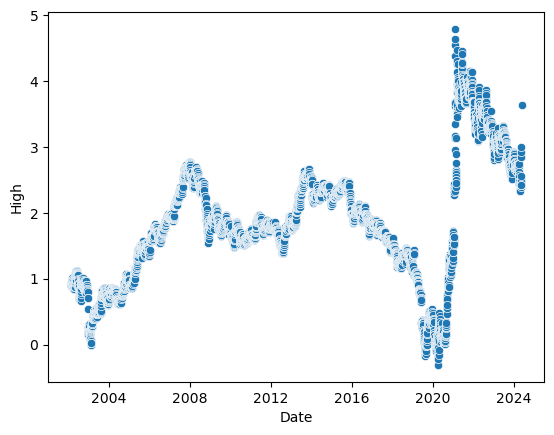

In [16]:
sns.scatterplot(data=df, x="Date", y="High")

Yeah

In [ ]:
df["numeric_time"] = pd.to